In [1]:
from google.colab import files
uploaded = files.upload()

Saving dataset1.csv to dataset1.csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [0]:
df = pd.read_csv('dataset1.csv')

In [50]:
pp.ProfileReport(df)

Number of variables,21
Number of observations,7052
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,168.0 B
Numeric,2
Categorical,18
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [0]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(int)
df['tenure']=df['tenure'].astype(int)
df['MonthlyCharges']=df['MonthlyCharges'].astype(int)
df['TotalCharges'].replace(" ",0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [52]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges        int64
TotalCharges        float64
Churn                object
dtype: object

In [53]:
#df.dropna()
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [54]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70,151.65,Yes


In [0]:
data_numeric=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

In [0]:
data_cat=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService',
         'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
         'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

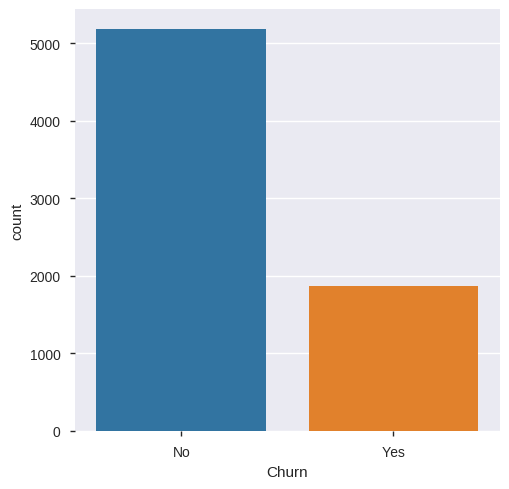

In [57]:
sns.catplot(x="Churn", kind="count", data=df,orient='h')

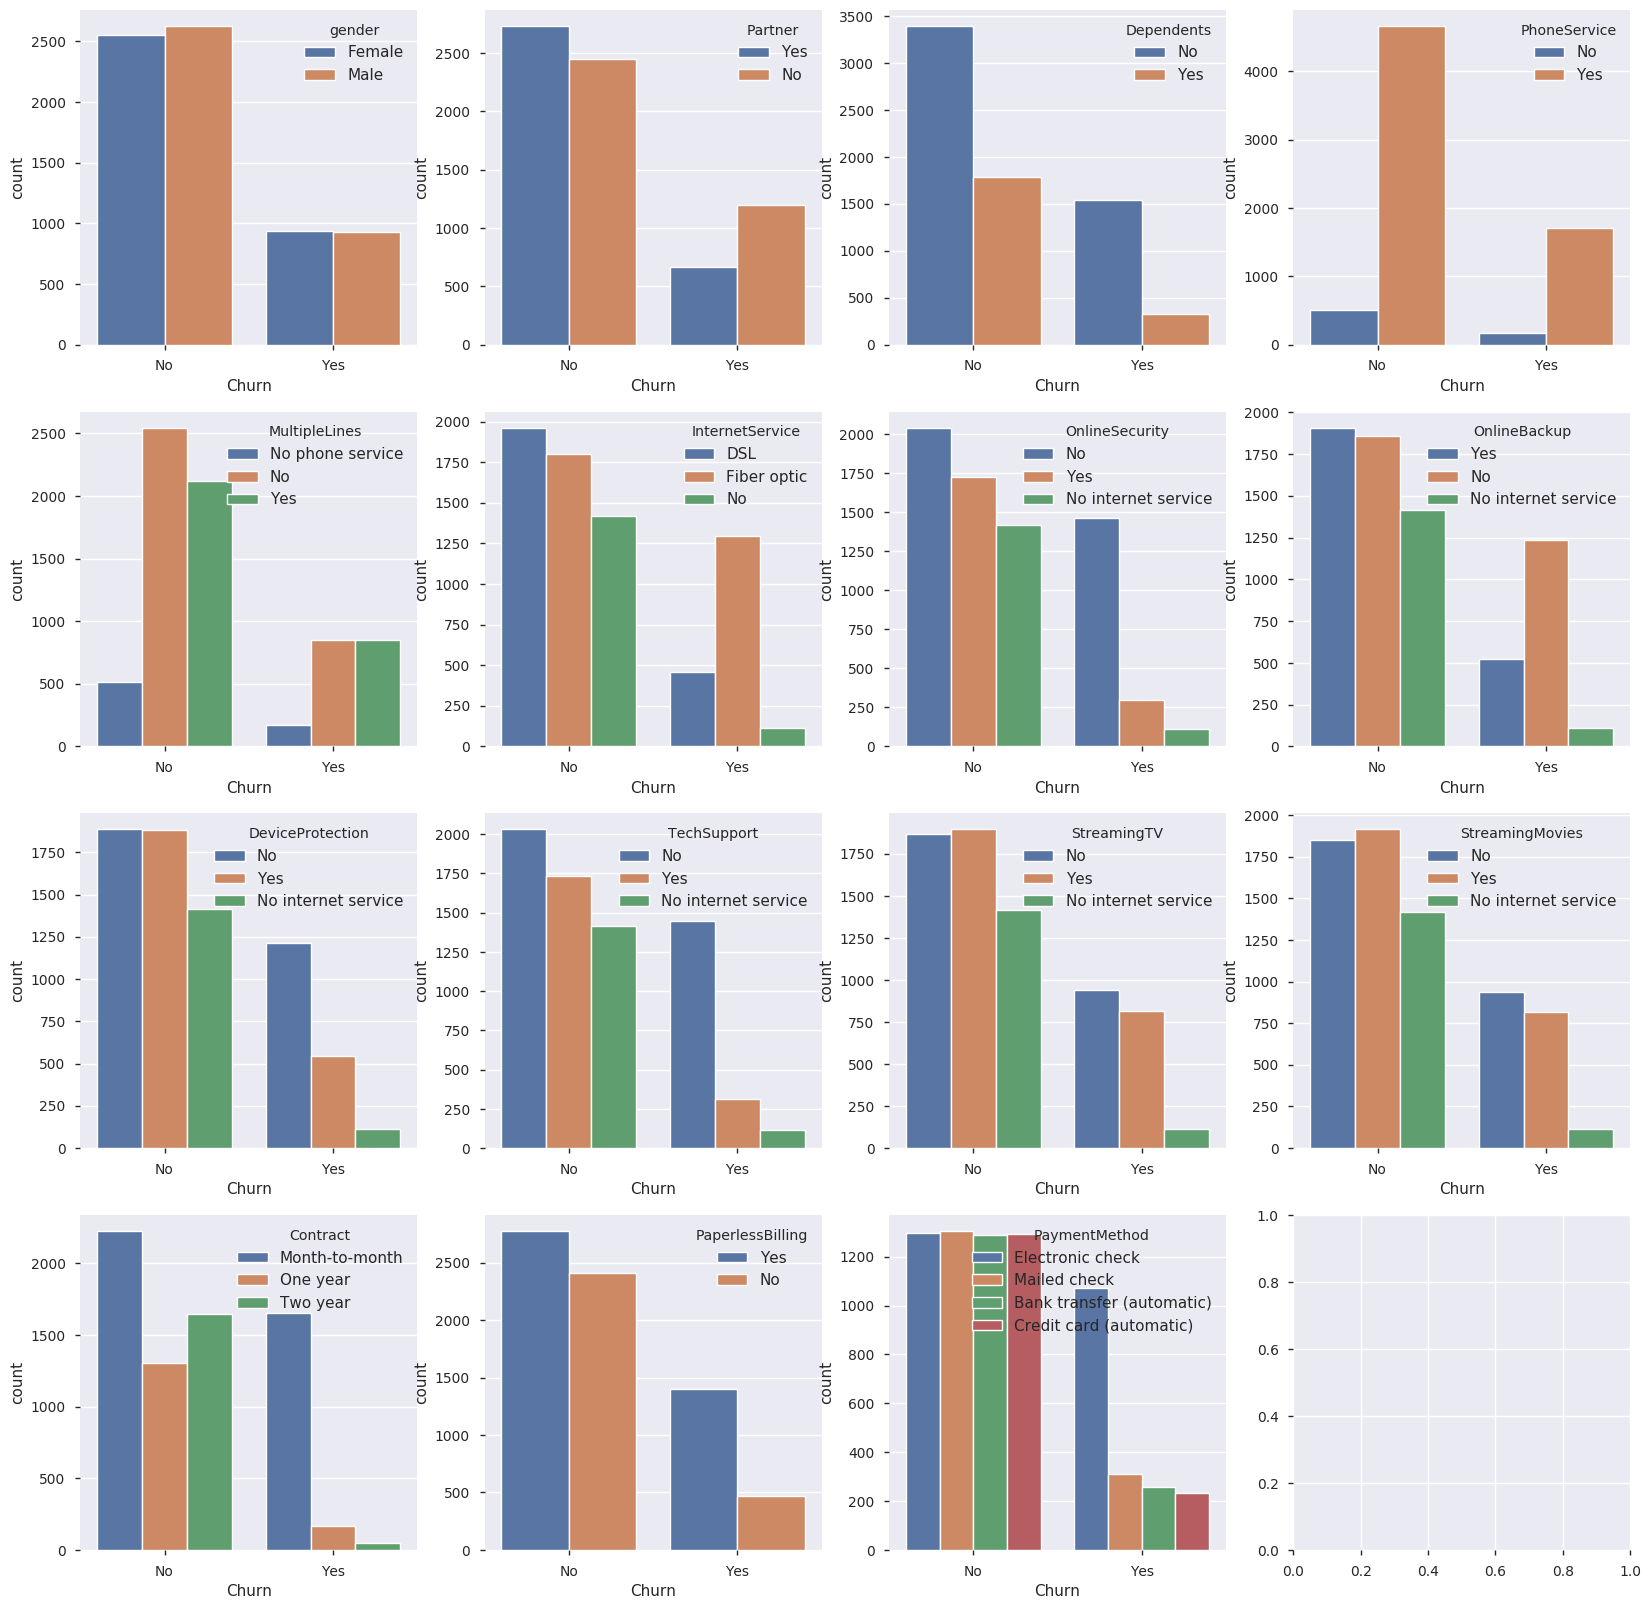

In [58]:
fig , ax = plt.subplots(4,4,figsize=(20,20))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,data_cat):
    sns.countplot(x=df["Churn"],hue=df[col],ax=axis)

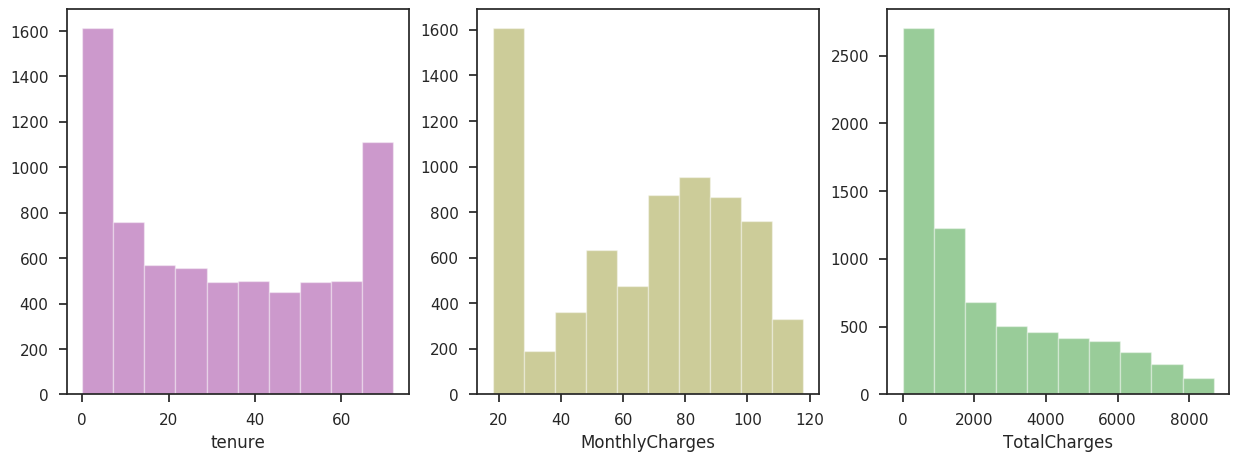

In [59]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

sns.distplot(df["tenure"],bins=10,kde=False,color="purple",ax=ax[0])
sns.distplot(df["MonthlyCharges"],bins=10,kde=False,color="olive",ax=ax[1])
sns.distplot(df["TotalCharges"],bins=10,kde=False,color="green",ax=ax[2])

In [0]:
#conversion of categorical to numerical
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [0]:
df['gender']=le.fit_transform(df['gender'])
df['Partner']=le.fit_transform(df['Partner'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['PhoneService']=le.fit_transform(df['PhoneService'])
df['MultipleLines']=le.fit_transform(df['MultipleLines'])
df['InternetService']=le.fit_transform(df['InternetService'])
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['Churn']=le.fit_transform(df['Churn'])

In [62]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151.65,1


In [63]:
df['TotalCharges'].fillna(0)
print(df.isnull().sum().sum())

0


Text(0.5, 1, 'correlation matrix')

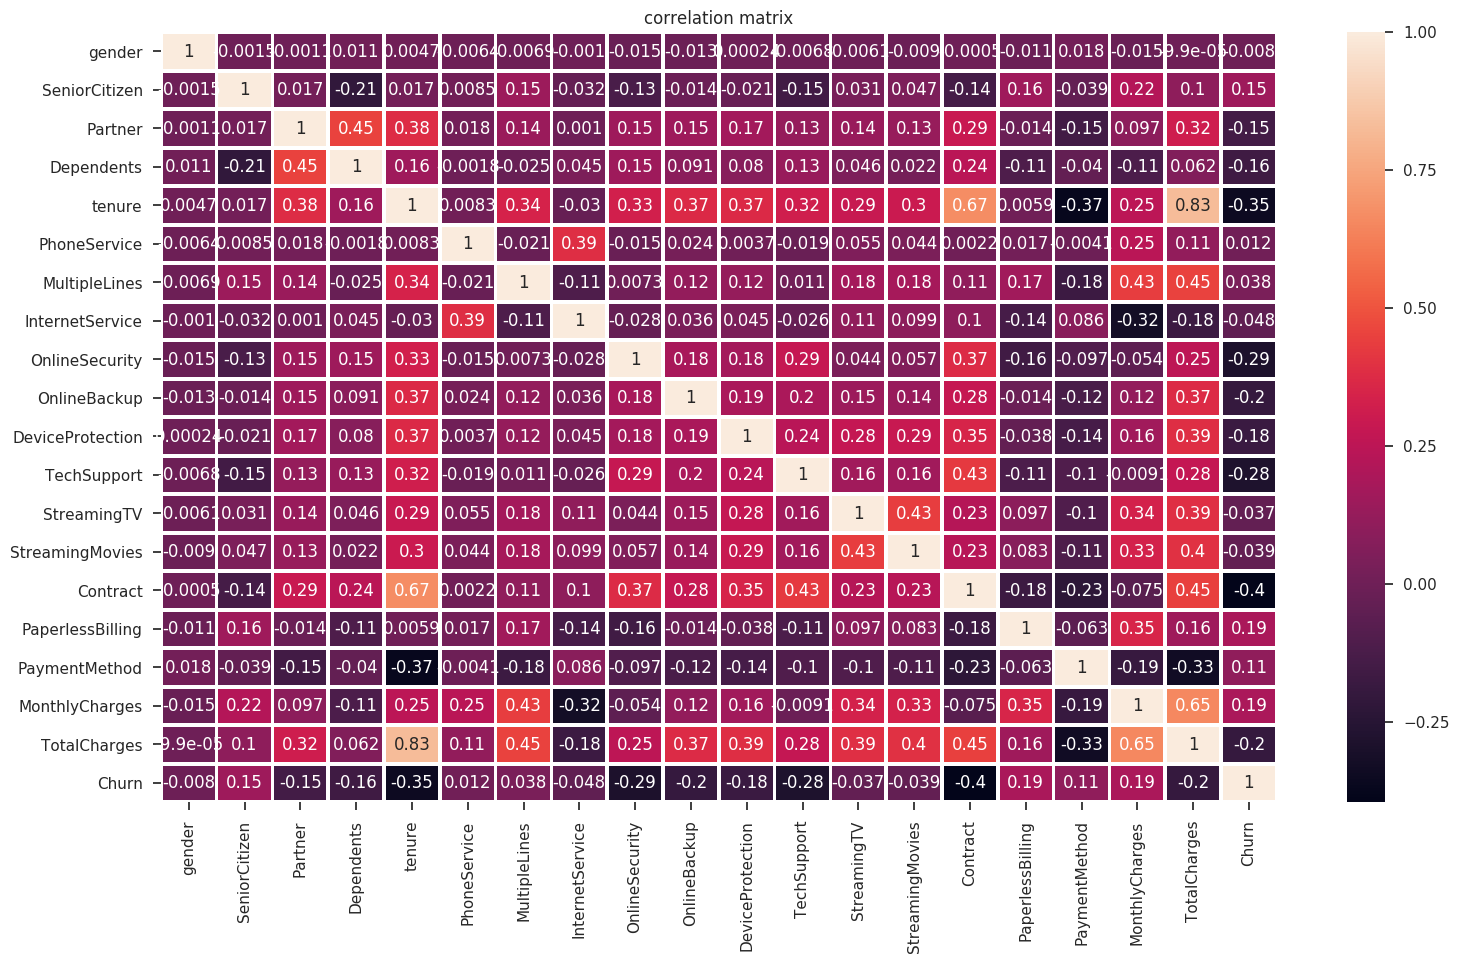

In [64]:
corr_matrix=df.corr()
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(corr_matrix,linewidths=2.0,ax=ax,annot=True)
ax.set_title('correlation matrix')

In [65]:
#looking for features that have correlation coefficient values close to -1 or +1.
df.corr()['Churn']

gender             -0.008043
SeniorCitizen       0.150555
Partner            -0.150016
Dependents         -0.163628
tenure             -0.352357
PhoneService        0.011894
MultipleLines       0.037754
InternetService    -0.047803
OnlineSecurity     -0.289219
OnlineBackup       -0.196048
DeviceProtection   -0.178489
TechSupport        -0.281836
StreamingTV        -0.036735
StreamingMovies    -0.038598
Contract           -0.396250
PaperlessBilling    0.192017
PaymentMethod       0.107424
MonthlyCharges      0.193404
TotalCharges       -0.198402
Churn               1.000000
Name: Churn, dtype: float64

In [66]:
#Every False in the preceding pandas Series represents a feature that has acorrelation value between -.15 and .15 
#inclusive, while True values correspond to features with preceding correlation values .15 or less than -0.15.
df.corr()['Churn'].abs() > .15

gender              False
SeniorCitizen        True
Partner              True
Dependents           True
tenure               True
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV         False
StreamingMovies     False
Contract             True
PaperlessBilling     True
PaymentMethod       False
MonthlyCharges       True
TotalCharges         True
Churn                True
Name: Churn, dtype: bool

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df.drop(['customerID','Churn'], axis=1)
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1234)

In [0]:
y_test=df['Churn']
X_test=df[['SeniorCitizen', 'Partner','Dependents', 'tenure', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection','TechSupport', 'Contract', 'PaperlessBilling',
           'MonthlyCharges','TotalCharges']]
y_train=df['Churn']
X_train=df[['SeniorCitizen', 'Partner','Dependents', 'tenure', 'OnlineSecurity', 
               'OnlineBackup', 'DeviceProtection','TechSupport', 'Contract', 'PaperlessBilling',
           'MonthlyCharges','TotalCharges']]

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [0]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,confusion_matrix, f1_score,roc_curve, roc_auc_score
def perfomance_record(clf):
    pred = clf.predict(X_test) 
    print("accuracy score",(100*accuracy_score(y_test,pred)))
    print("precision score",(100*precision_score(y_test,pred)))
    print("recall score", (100*recall_score(y_test,pred)))
    print("f1 score", (100*f1_score(y_test,pred, average="micro")))
    print("confusion matrix", confusion_matrix(y_test,pred))
    fpr, tpr, threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
    roc_auc_score_ = roc_auc_score(y_test,pred)
    print("roc value",roc_auc_score_)
    plt.figure()
    plt.plot(fpr,tpr, label="Roc_AUC_score (area = %0.2f)" %roc_auc_score_)
    plt.plot([0,1],[0,1], "r--")
    plt.xlabel('True postive rate')
    plt.ylabel('False Postive rate')
    plt.legend(loc="lower right")

accuracy score 82.14690867838911
precision score 69.94784876140808
recall score 57.349011223944416
f1 score 82.14690867838911
confusion matrix [[4720  461]
 [ 798 1073]]
roc value 0.7422555753245087


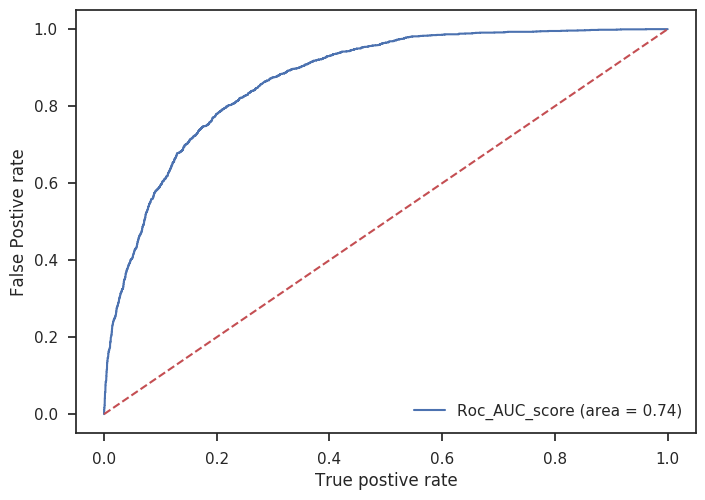

In [72]:
from sklearn.neural_network import MLPClassifier
clmlp =MLPClassifier()
clmlp.fit(X_train,y_train)
perfomance_record(clmlp)

accuracy score 99.46114577424844
precision score 99.72870320130222
recall score 98.23623730625334
f1 score 99.46114577424844
confusion matrix [[5176    5]
 [  33 1838]]
roc value 0.9906986542016006


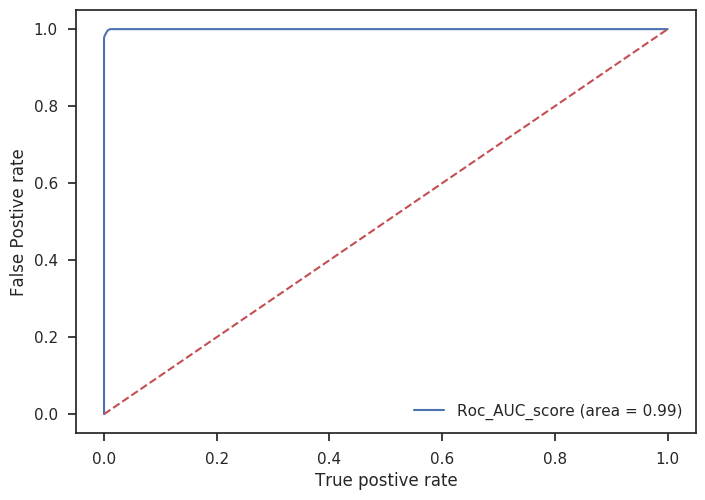

In [99]:
#dECISION tREE
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)
perfomance_record(clf_tree)

In [0]:
import pydotplus
from sklearn import tree
import graphviz
dt_graphviz = tree.export_graphviz(clf_tree,filled=True, rounded=True,
              special_characters=True, max_depth=3, out_file = None,feature_names=['SeniorCitizen', 'Partner','Dependents', 'tenure',
                                                                      'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                                                      'TechSupport', 'Contract', 'PaperlessBilling','MonthlyCharges',
                                                                      'TotalCharges'],class_names=['0','1'])

pydot_graph = pydotplus.graph_from_dot_data(dt_graphviz)

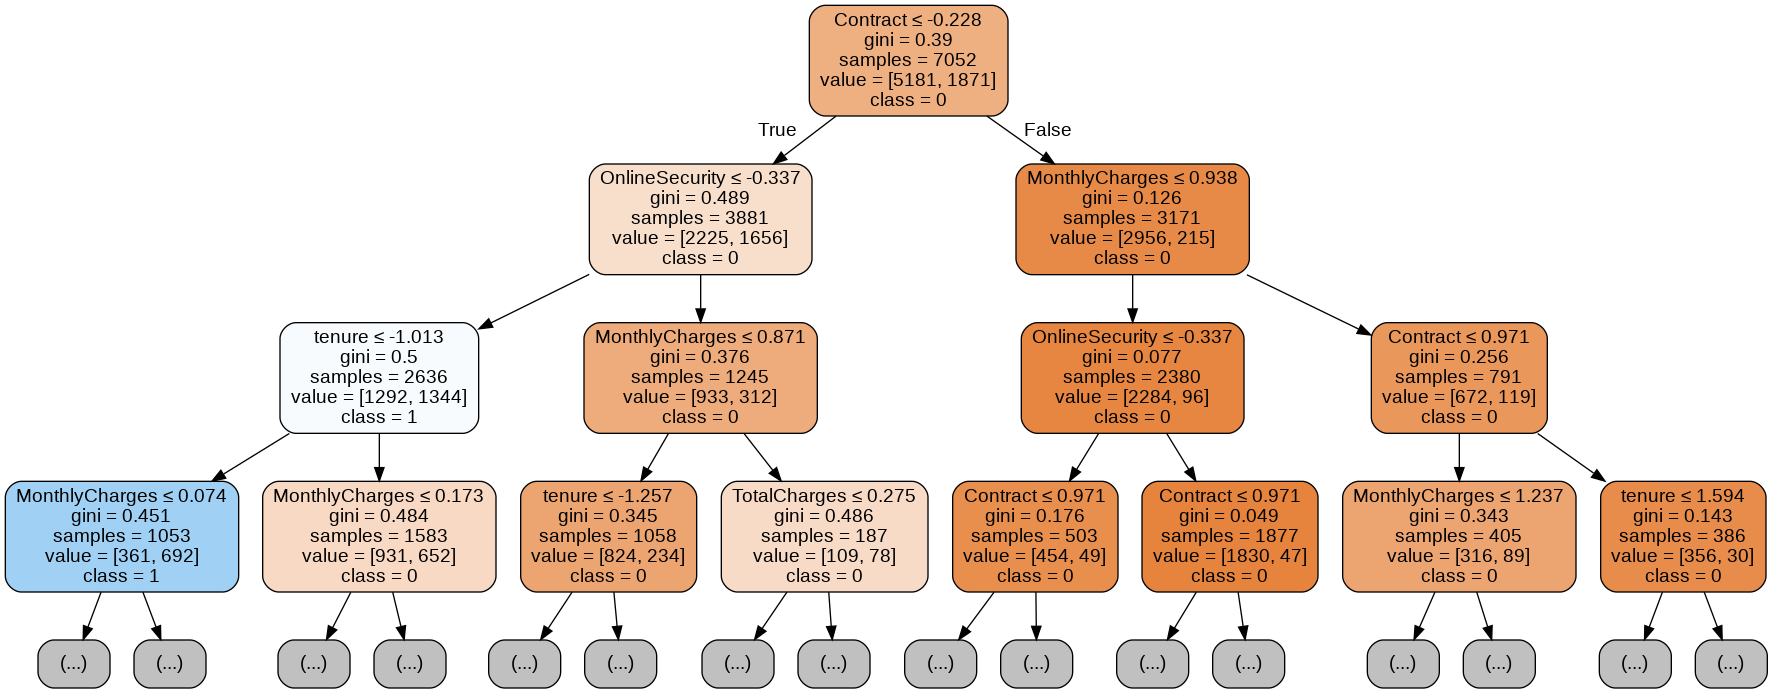

In [103]:
from IPython.display import Image
Image(pydot_graph.create_png())

accuracy score 97.43335224049915
precision score 97.74011299435028
recall score 92.46392303580973
f1 score 97.43335224049915
confusion matrix [[5141   40]
 [ 141 1730]]
roc value 0.9584593565417199


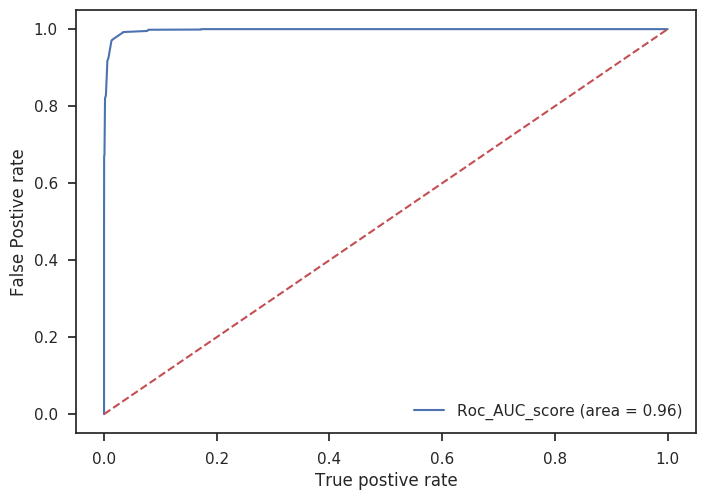

In [90]:
#rANDOM fOREST
from sklearn.ensemble import RandomForestClassifier
clf_n = RandomForestClassifier()
clf_n.fit(X_train, y_train)
perfomance_record(clf_n)

accuracy score 80.20419739081112
precision score 67.79026217228464
recall score 48.36985569214324
f1 score 80.20419739081112
confusion matrix [[4751  430]
 [ 966  905]]
roc value 0.7003514981094326


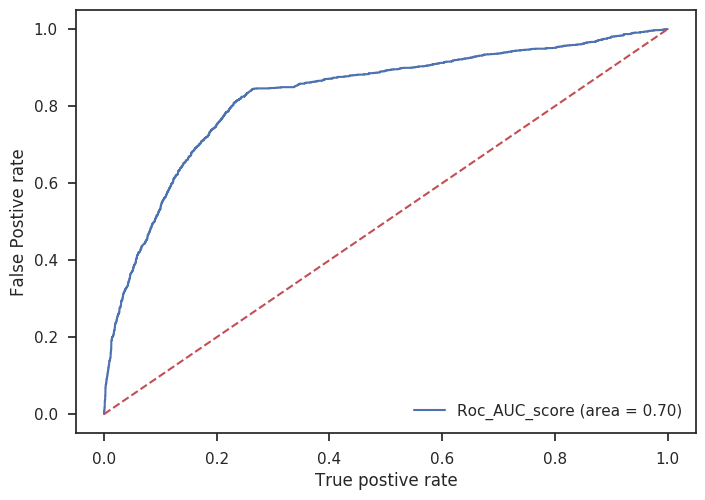

In [91]:
#SVM
from sklearn.svm import SVC
clf_s = SVC(kernel='rbf',probability=True)
clf_s.fit(X_train, y_train)
perfomance_record(clf_s)

accuracy score 74.67385138967668
precision score 51.57699443413729
recall score 74.29182255478354
f1 score 74.67385138967668
confusion matrix [[3876 1305]
 [ 481 1390]]
roc value 0.7455181747310687


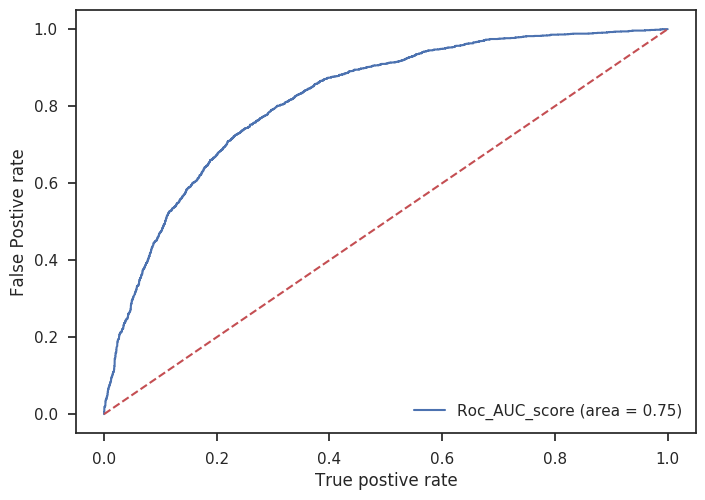

In [92]:
#nAIVE bAYES
from sklearn.naive_bayes import GaussianNB
clf_naive = GaussianNB()
clf_naive.fit(X_train, y_train)
perfomance_record(clf_naive)